# import packages

In [1]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import os
import matplotlib.pyplot as plt

## load model

In [2]:
blip_model = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base", device='cuda')
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# get user description

In [3]:
def get_image_description(image_path):
    image = Image.open(image_path)
    description = blip_model(image)[0]['generated_text']
    return description

# convert description to embedding

In [4]:
def get_description_embedding(description):
    return sentence_model.encode(description, convert_to_tensor=True)

## find best match image with description

In [8]:
def find_matching_image(image_folder, input_description):
    input_embedding = get_description_embedding(input_description)
    
    best_match = None
    highest_similarity = -1
    
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)
        if os.path.isfile(image_path):
            description = get_image_description(image_path)
            description_embedding = get_description_embedding(description)
            
            similarity = util.pytorch_cos_sim(input_embedding, description_embedding).item()
            print(similarity)

            if similarity > highest_similarity:
                highest_similarity = similarity
                best_match = image_path
                
    return best_match

## implementation

In [9]:
image_folder = 'image_dataset'
input_description = 'car in accident'
matching_image = find_matching_image(image_folder, input_description)

/home/ahmad/anaconda3/envs/llm-course/lib/python3.12/site-packages/transformers/generation/utils.py:1259: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


0.22705969214439392
0.21416857838630676
0.18943698704242706
0.07655125856399536
0.295049250125885
0.2818968892097473
0.3168002963066101
0.3614668548107147
0.3596058785915375
0.2697977125644684
0.17781278491020203
0.34055161476135254
0.3376167416572571
0.7154357433319092
0.2371261715888977


Matching image found: image_dataset/auto-accident-loans.jpg


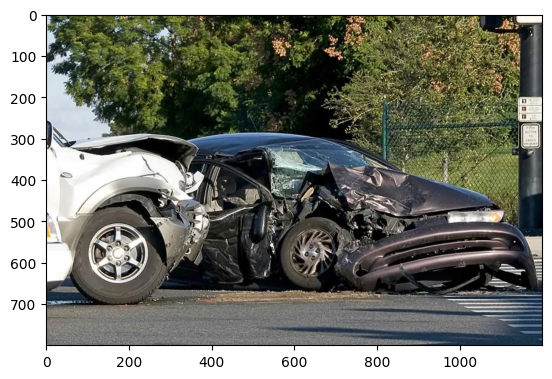

In [7]:
if matching_image:
    print(f"matching image found: {matching_image}")
    plt.imshow(plt.imread(matching_image))

else:
    print("no matching image found")